In [1]:
#Anaconda cmd
#conda activate EnvTensorFlow
#open 'jupyter notebook' in cmd

In [2]:
#conda env list

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir(r'C:\1. KULIAH\MATKUL\SEMESTER 4\(IF 540-A-HY) Machine Learning\PROJECT')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [2]:
data = []
labels = []
classes = 43
filepath = os.getcwd()

In [3]:
filepath

'C:\\1. KULIAH\\MATKUL\\SEMESTER 4\\(IF 540-A-HY) Machine Learning\\PROJECT'

# Preprocessing Image

In [4]:
for i in range(classes):
    path = os.path.join(filepath, 'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\' + a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

# Converting lists into arrays

In [5]:
data = np.array(data)
labels = np.array(labels)

# Save Data and Labels for future use

In [54]:
np.save('./training/data',data)
np.save('./training/target',labels)

# Load data & Labels

In [ ]:
data = np.load('./training/data.npy')
labels = np.load('./training/target.npy')

In [6]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


## Splitting

In [7]:
X_train,X_test,y_train, y_test = train_test_split(data,labels,
                                                 test_size = 0.2,
                                                 random_state=0)

In [8]:
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


# Convert labels to onehot encoding 

In [9]:
y_train = to_categorical(y_train,43)
y_test = to_categorical(y_test,43)

In [10]:
print(y_train.shape)
print(y_test.shape)

(31367, 43)
(7842, 43)


In [8]:
print(len(os.listdir(filepath)))

12


# Build Model 1

In [26]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size =(5,5), activation= 'relu', input_shape=X_train.shape[1: ]))
model.add(Conv2D(filters=32, kernel_size =(5,5), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate= 0.25))
model.add(Conv2D(filters=64, kernel_size =(3, 3), activation = 'relu'))
model.add(Conv2D(filters=64, kernel_size =(3, 3), activation= 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout (rate=0.25))
model.add(Flatten())
model.add(Dense (256, activation = 'relu'))
model.add(Dropout (rate = 0.5))

# 43 classes in the Dense
model.add(Dense(43, activation='softmax'))

In [27]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
epochs=10
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10
981/981 [==============================] - 165s 167ms/step - loss: 1.7909 - accuracy: 0.5483 - val_loss: 0.3869 - val_accuracy: 0.9069
Epoch 2/10
981/981 [==============================] - 161s 164ms/step - loss: 0.5989 - accuracy: 0.8293 - val_loss: 0.1761 - val_accuracy: 0.9582
Epoch 3/10
981/981 [==============================] - 156s 159ms/step - loss: 0.3944 - accuracy: 0.8873 - val_loss: 0.1664 - val_accuracy: 0.9526
Epoch 4/10
981/981 [==============================] - 155s 158ms/step - loss: 0.3021 - accuracy: 0.9157 - val_loss: 0.0782 - val_accuracy: 0.9783
Epoch 5/10
981/981 [==============================] - 158s 161ms/step - loss: 0.2599 - accuracy: 0.9267 - val_loss: 0.0923 - val_accuracy: 0.9733
Epoch 6/10
981/981 [==============================] - 144s 147ms/step - loss: 0.2509 - accuracy: 0.9295 - val_loss: 0.0578 - val_accuracy: 0.9850
Epoch 7/10
981/981 [==============================] - 140s 143ms/step - loss: 0.2108 - accuracy: 0.9418 - val_loss: 0.0654 -

# Build Model 2 
### Same second layer kernel size and pooling size

In [32]:
model2 = Sequential()
model2.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]))
model2.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(rate=0.25))

# Additional convolutional layer with increased filter size
model2.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model2.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(rate=0.25))

model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(rate=0.5))
model2.add(Dense(43, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history2 = model2.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10
981/981 [==============================] - 132s 134ms/step - loss: 1.9869 - accuracy: 0.4733 - val_loss: 0.5573 - val_accuracy: 0.8613
Epoch 2/10
981/981 [==============================] - 134s 136ms/step - loss: 0.7358 - accuracy: 0.7909 - val_loss: 0.2210 - val_accuracy: 0.9504
Epoch 3/10
981/981 [==============================] - 106s 108ms/step - loss: 0.4938 - accuracy: 0.8658 - val_loss: 0.1701 - val_accuracy: 0.9591
Epoch 4/10
981/981 [==============================] - 107s 110ms/step - loss: 0.3837 - accuracy: 0.8965 - val_loss: 0.1060 - val_accuracy: 0.9754
Epoch 5/10
981/981 [==============================] - 108s 110ms/step - loss: 0.3080 - accuracy: 0.9200 - val_loss: 0.0922 - val_accuracy: 0.9799
Epoch 6/10
981/981 [==============================] - 107s 109ms/step - loss: 0.2817 - accuracy: 0.9294 - val_loss: 0.0891 - val_accuracy: 0.9809
Epoch 7/10
981/981 [==============================] - 107s 109ms/step - loss: 0.2736 - accuracy: 0.9330 - val_loss: 0.0769 -

# Build Model 3
### Increase number of filter on both layer

In [36]:
model3 = Sequential()
model3.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]))
model3.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model3.add(MaxPool2D(pool_size=(2, 2)))
model3.add(Dropout(rate=0.25))

model3.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model3.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model3.add(MaxPool2D(pool_size=(2, 2)))
model3.add(Dropout(rate=0.25))

model3.add(Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(rate=0.5))
model3.add(Dense(43, activation='softmax'))

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
history3 = model3.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10
981/981 [==============================] - 259s 264ms/step - loss: 1.9087 - accuracy: 0.5090 - val_loss: 0.5201 - val_accuracy: 0.8592
Epoch 2/10
981/981 [==============================] - 252s 257ms/step - loss: 0.6665 - accuracy: 0.8040 - val_loss: 0.2632 - val_accuracy: 0.9209
Epoch 3/10
981/981 [==============================] - 293s 299ms/step - loss: 0.3874 - accuracy: 0.8872 - val_loss: 0.1362 - val_accuracy: 0.9609
Epoch 4/10
981/981 [==============================] - 256s 261ms/step - loss: 0.2832 - accuracy: 0.9185 - val_loss: 0.1434 - val_accuracy: 0.9615
Epoch 5/10
981/981 [==============================] - 241s 246ms/step - loss: 0.2436 - accuracy: 0.9306 - val_loss: 0.1013 - val_accuracy: 0.9704
Epoch 6/10
981/981 [==============================] - 244s 249ms/step - loss: 0.2275 - accuracy: 0.9374 - val_loss: 0.0699 - val_accuracy: 0.9815
Epoch 7/10
981/981 [==============================] - 239s 244ms/step - loss: 0.2219 - accuracy: 0.9400 - val_loss: 0.0868 -

# Build Model 4
### Using Average pooling

In [39]:
from keras.layers import AveragePooling2D

In [40]:
model4 = Sequential()
model4.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]))
model4.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model4.add(AveragePooling2D(pool_size=(2, 2)))
model4.add(Dropout(rate=0.25))

model4.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model4.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model4.add(AveragePooling2D(pool_size=(2, 2)))
model4.add(Dropout(rate=0.25))

model4.add(Flatten())
model4.add(Dense(256, activation='relu'))
model4.add(Dropout(rate=0.5))
model4.add(Dense(43, activation='softmax'))

model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
history4 = model4.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10
981/981 [==============================] - 127s 129ms/step - loss: 1.6710 - accuracy: 0.5678 - val_loss: 0.3752 - val_accuracy: 0.8884
Epoch 2/10
981/981 [==============================] - 119s 121ms/step - loss: 0.4647 - accuracy: 0.8629 - val_loss: 0.1522 - val_accuracy: 0.9610
Epoch 3/10
981/981 [==============================] - 120s 122ms/step - loss: 0.3009 - accuracy: 0.9126 - val_loss: 0.0799 - val_accuracy: 0.9792
Epoch 4/10
981/981 [==============================] - 118s 120ms/step - loss: 0.2174 - accuracy: 0.9368 - val_loss: 0.0858 - val_accuracy: 0.9782
Epoch 5/10
981/981 [==============================] - 117s 119ms/step - loss: 0.1807 - accuracy: 0.9492 - val_loss: 0.0580 - val_accuracy: 0.9838
Epoch 6/10
981/981 [==============================] - 136s 139ms/step - loss: 0.1672 - accuracy: 0.9518 - val_loss: 0.0521 - val_accuracy: 0.9864
Epoch 7/10
981/981 [==============================] - 324s 331ms/step - loss: 0.1545 - accuracy: 0.9563 - val_loss: 0.0468 -

# Evaluation

In [14]:
plt.figure(0)
plt.plot(history.history['accuracy'],label = 'training accuracy')
plt.plot(history.history['val_accuracy'],label = 'val accuracy')
plt.plot(history2.history['accuracy'],label = 'training accuracy 2')
plt.plot(history2.history['val_accuracy'],label = 'val accuracy 2')
plt.plot(history3.history['accuracy'],label = 'training accuracy 3')
plt.plot(history3.history['val_accuracy'],label = 'val accuracy 3')
plt.plot(history4.history['accuracy'],label = 'training accuracy 4')
plt.plot(history4.history['val_accuracy'],label = 'val accuracy 4')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

NameError: name 'history' is not defined

<Figure size 640x480 with 0 Axes>

In [15]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

NameError: name 'history' is not defined

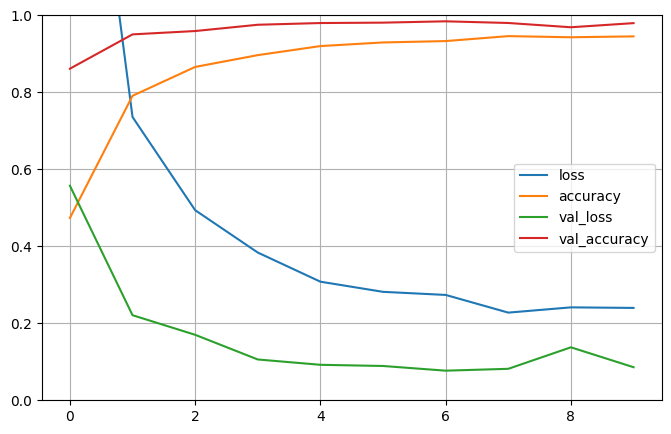

In [47]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

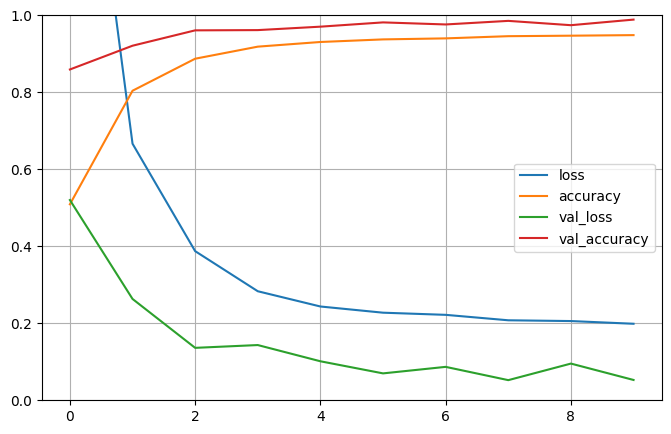

In [48]:
pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

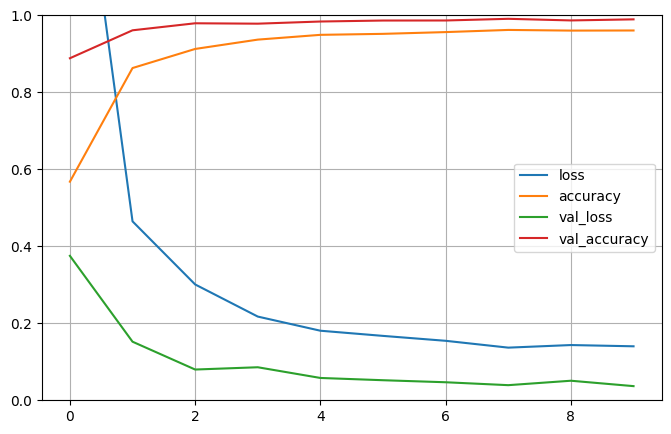

In [49]:
pd.DataFrame(history4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Model 4 dipilih

In [9]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test['ClassId'].values
    imgs = y_test['Path'].values
    data = []
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test = np.array(data)
    return X_test,label

In [10]:
X_test, label = testing('Test.csv')

In [11]:
probs = model4.predict(X_test)
Y_pred = np.argmax(probs, axis=1)
Y_pred

395/395 [==============================] - 16s 40ms/step


array([16,  1, 38, ..., 32,  7, 10], dtype=int64)

# Testing Accuracy

In [12]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label,Y_pred))

0.963341250989707


In [55]:
#saving model
model.save('./training/model.h5')
model2.save('./training/model2.h5')
model3.save('./training/model3.h5')
model4.save('./training/model4.h5')

In [5]:
#load model
import os
os.chdir(r'C:\1. KULIAH\MATKUL\SEMESTER 4\(IF 540-A-HY) Machine Learning\PROJECT')
from keras.models import load_model
model1 = load_model('./training/model.h5')
model2 = load_model('./training/model2.h5')
model3 = load_model('./training/model3.h5')
model4 = load_model('./training/model4.h5')

In [6]:
classes = {0:'Speed limit (20km/h)',
           1:'Speed limit (30km/h)',
           2:'Speed limit (50km/h)',
           3:'Speed limit (60km/h)',
           4:'Speed limit (70km/h)',
           5:'Speed limit (80km/h)',
           6:'End of speed limit (80km/h)',
           7:'Speed limit (100km/h)',
           8:'Speed limit (120km/h)',
           9:'No passing',
           10:'No passing vehicle over 3.5 tons',
           11:'Right-of-way at intersection',
           12:'Priority road',
           13:'Yield',
           14:'Stop',
           15:'No vehicles',
           16:'Vehicle over 3.5 tons prohibited',
           17:'No entry',
           18:'General caution',
           19:'Dangerous curve left',
           20:'Dangerous curve right',
           21:'Double curve',
           22:'Bumpy road',
           23:'Slippery road',
           24:'Road narrows on the right',
           25:'Road work',
           26:'Traffic signals',
           27:'Pedestrian',
           28:'Children crossing',
           29:'Bicycles crossing',
           30:'Beware of ice/snow',
           31:'Wild animals crossing',
           32:'End speed + passing limits',
           33:'Turn right ahead',
           34:'Turn left ahead',
           35:'Ahead only',
           36:'Go straight or right',
           37:'Go straight or left',
           38:'Keep right',
           39:'Keep left',
           40:'Roundabout mandatory',
           41:'End of no passing',
           42:'End no passing vehicle > 3.5 tons',}

In [13]:
def test_on_img(img):
    data = []
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test = np.array(data)
    probs = model4.predict(X_test)
    Y_pred = np.argmax(probs, axis=1)
    return image, Y_pred

Y_pred

array([16,  1, 38, ..., 32,  7, 10], dtype=int64)

1/1 [==============================] - 0s 41ms/step
Predicted traffic sign is: Road work


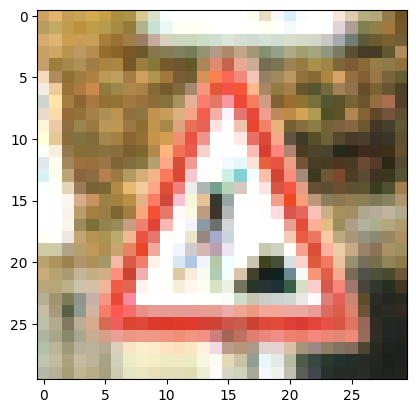

In [22]:
plot, prediction = test_on_img(r"C:\1. KULIAH\MATKUL\SEMESTER 4\(IF 540-A-HY) Machine Learning\PROJECT\Test\00008.png")
s = [str(i) for i in prediction]
a = int("".join(s))
print('Predicted traffic sign is:', classes[a])
plt.imshow(plot)
plt.show()